<a href="https://colab.research.google.com/github/syadali/CNIT483/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 2**

Due by **October 16, 2024**

In this problem, we will explore to apply logistic regression to solve a real-world problem of diagnostically predicting whether a patient has diabetes based on the given dataset, Data_HW2.csv. The dataset consists of information on Pregnancy Times, Glucose, Blood Pressure, Skin Thickness, Serum Insulin, BMI, Diabetes Predigree Function, Age, and the ground truth of diagnosis result.    

Requirments:
*   You need to include the following three components in your lab report: (1) the codes, (2) the obtained training accuracy, and (3) the obtained testing accuracy.

(Note: the logistic regression model is considered to have a reasonable performance if it can achieve a training/testing accuracy above $70\%$.)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26 (108.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 17 (72.00 B)

Epoch 1/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - accuracy: 0.3542 - loss: 1.0704 - val_accuracy: 0.3550 - val_loss: 1.0878
Epoch 2/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3935 - loss: 1.0546 - val_accuracy: 0.3420 - val_loss: 1.0689
Epoch 3/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3984 - loss: 1.0317 - val_accuracy: 0.3506 - val_loss: 1.0508
Epoch 4/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4024 - loss: 1.0190 - val_accuracy: 0.3506 - val_loss: 1.0332
Epoch 5/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3979 - loss: 1.0186 - val_accuracy: 0.3680 - val_loss: 1.0162
Epoch 6/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4325 - loss: 0.9721 - val_accuracy: 0.3723 - val_loss: 0.9995
Epoch 7/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3942 - loss: 1.0260 - val_accuracy: 0.3810 - val_loss: 0.9837
Epoch 8/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4227 - loss: 0.9678 - val_accuracy: 0.3896 -

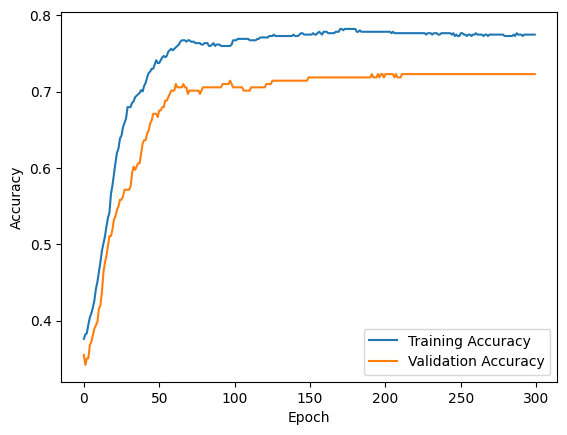

8/8 - 0s - 3ms/step - accuracy: 0.7229 - loss: 0.6184
Test Accuracy: 0.7229437232017517
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Training Accuracy: 0.7746741154562383
Testing Accuracy: 0.7229437229437229


In [ ]:
# import python libs
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight

# Obtain your data samples
data=pd.read_csv('/content/sample_data/Data_HW2.csv')

# Define features (X) and target variable (y)
X = data[['PregnancyTime', 'Glucose', 'BloodPressure', 'SkinThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y = data['Diagnosis_result'].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute class weights in case of class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Design the logistic regression model
model = models.Sequential()

# Normalization layer
model.add(layers.Normalization(input_shape=(X_train_scaled.shape[1],)))

# Add a dense layer with sigmoid activation for binary classification
model.add(layers.Dense(1, activation='sigmoid', activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Model summary
model.summary()

# Compile the model using Adam optimizer and binary cross-entropy loss
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Train the model with the training data and validation on the test set
history = model.fit(X_train_scaled, y_train, epochs=300, validation_data=(X_test_scaled, y_test), class_weight=class_weights_dict)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

# Predictions (use a threshold of 0.5 for binary classification)
y_train_pred = (model.predict(X_train_scaled) > 0.5).astype(int)
y_test_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

# Calculate training and testing accuracy using accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print out the accuracies
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")